##ECSE 415 - Assignment 1: Image Filtering and Edge Detection

#Theo Ghanem 260972584

#1  Harris Corner Detection

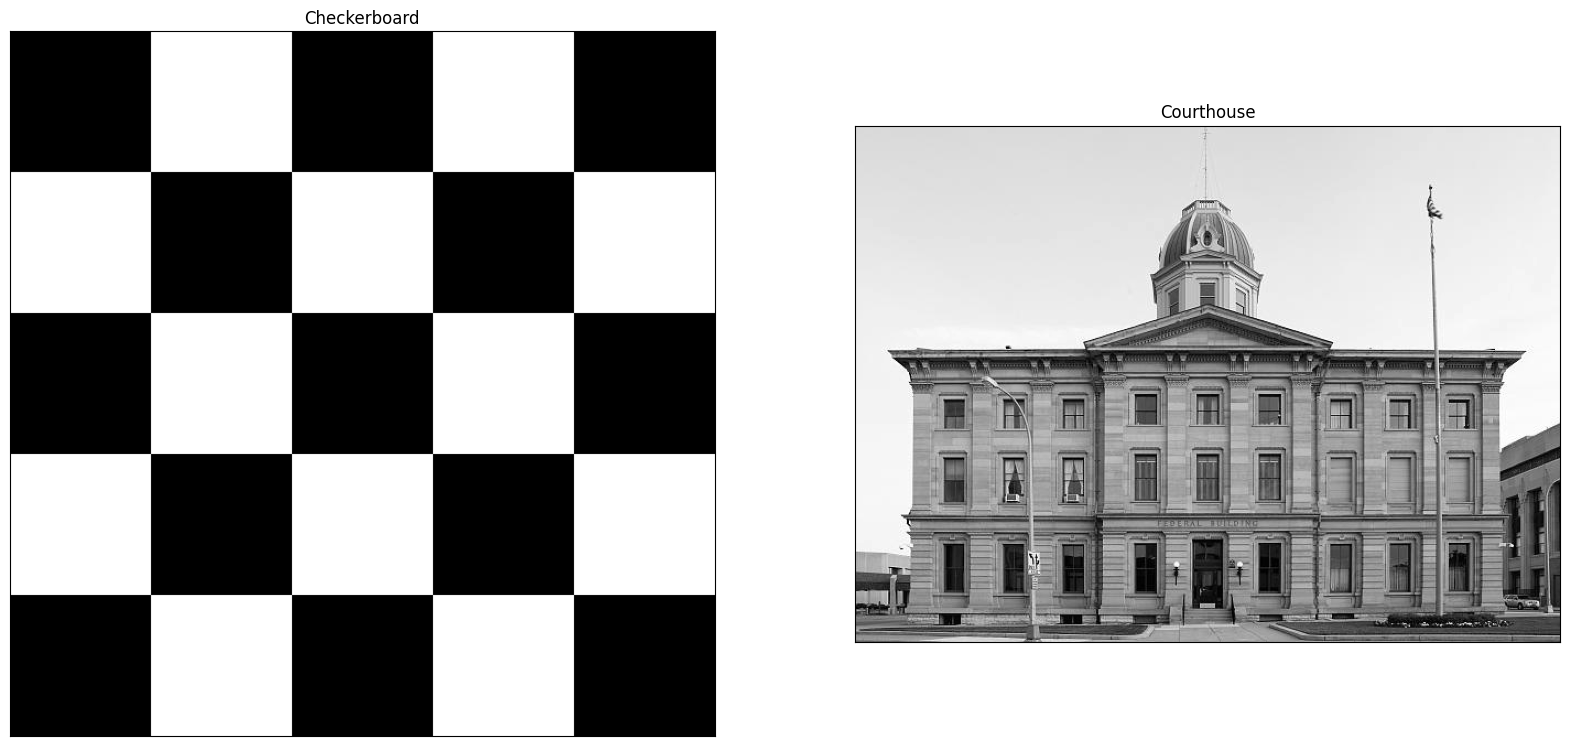

In [149]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

path = '/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A2/A2-W24-images/Data/'

#Load the 2 images
checkerboard = cv2.imread(path+'Q1/checkerboard.png')
courthouse = cv2.imread(path+'Q1/courthouse_gray.jpg')

checkerboard = cv2.cvtColor(checkerboard, cv2.COLOR_BGR2GRAY)
courthouse = cv2.cvtColor(courthouse, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(checkerboard, cmap='gray') # 2x2 subplot, 1 selected
plt.title("Checkerboard"), plt.xticks([]), plt.yticks([]) # title and remove the axis tick
plt.subplot(122), plt.imshow(courthouse, cmap='gray') # 2x2 subplot, 2 selected
plt.title("Courthouse"), plt.xticks([]), plt.yticks([])
plt.show()

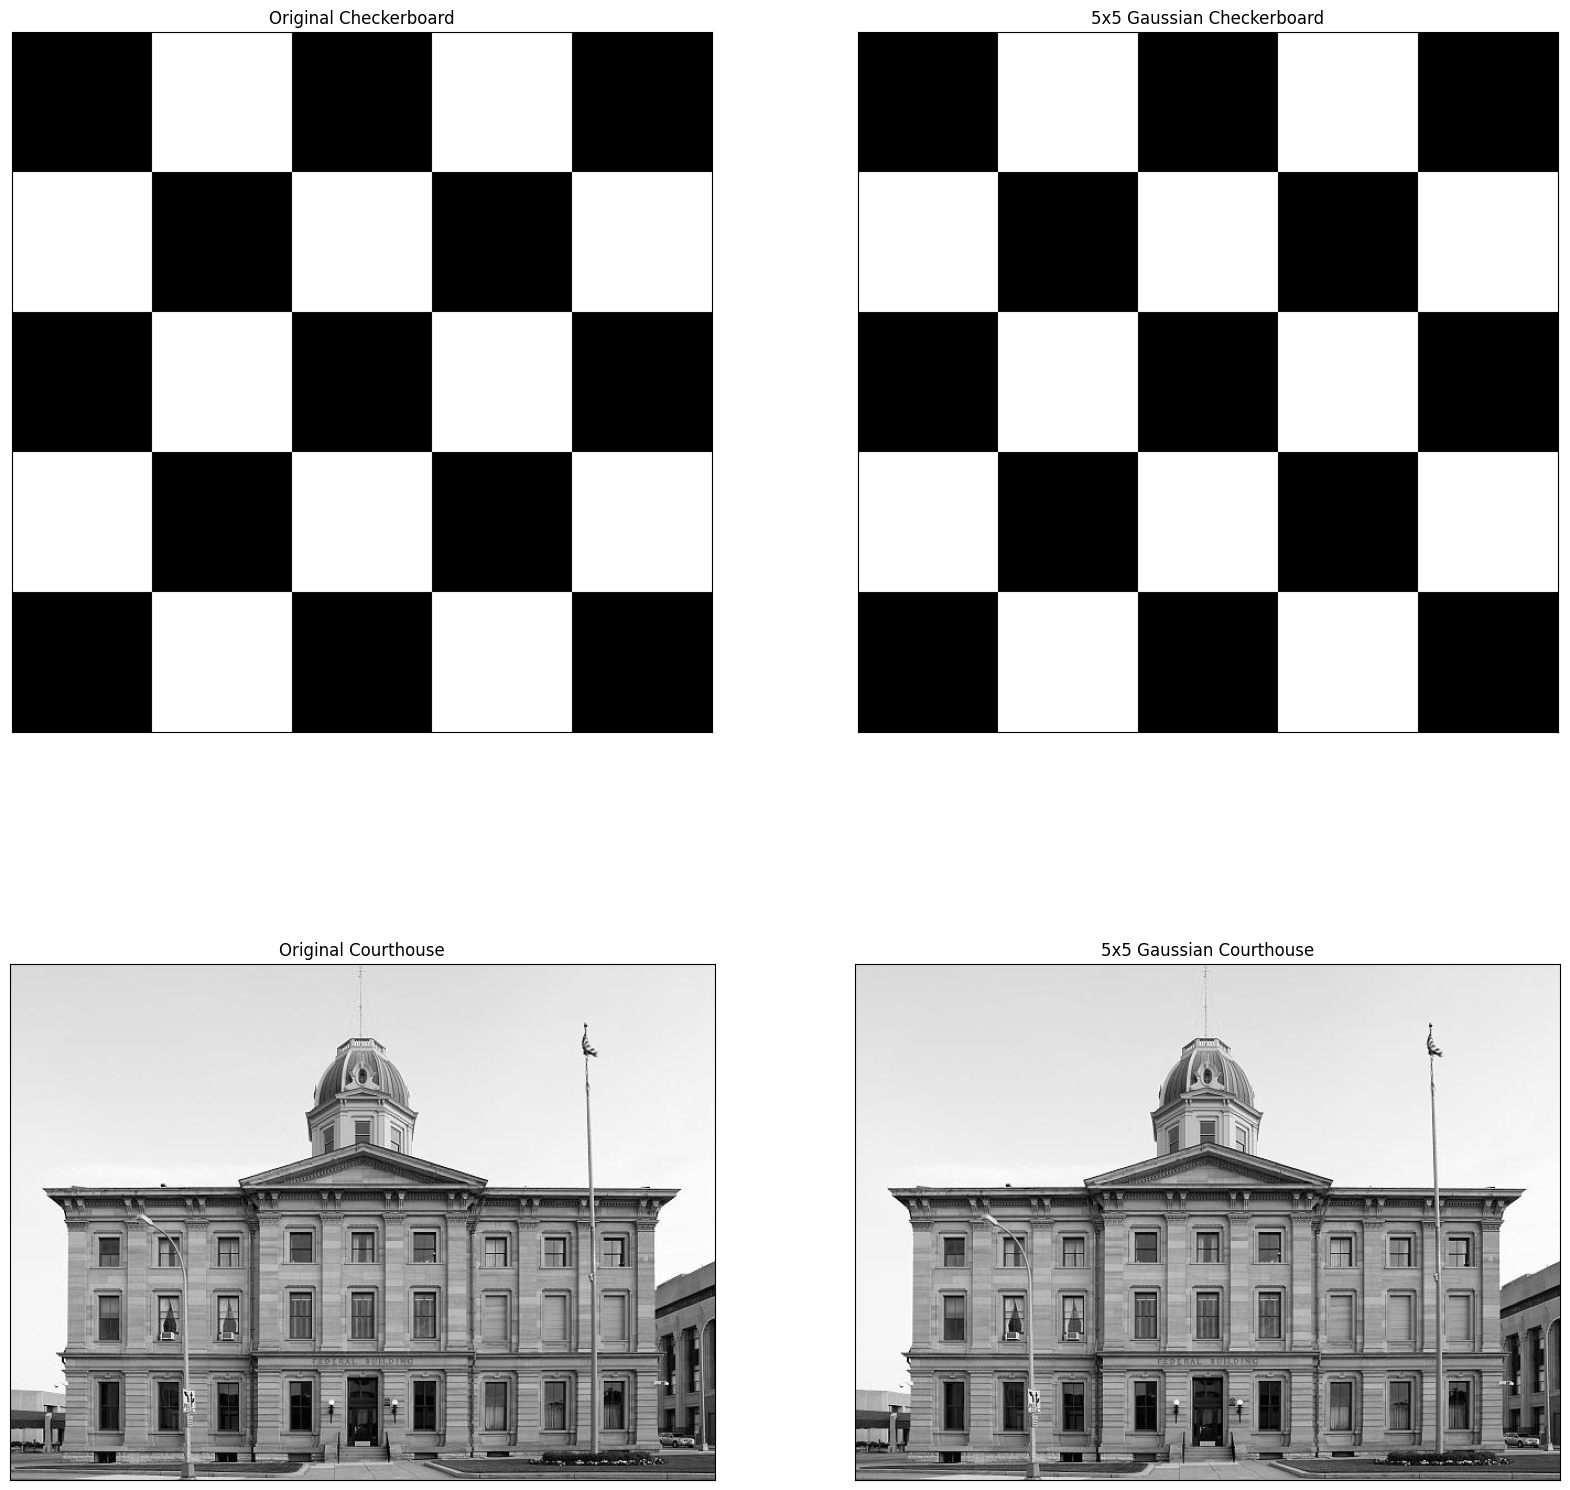

In [150]:
#Smoothing the images using Gaussian Blur as specified in Tutorial 2

# filter image using 5x5 Gaussian, the std is calculated automatically
# checkerboard_Gaussian_5 = cv2.GaussianBlur(checkerboard, (3,3), 0)
# courthouse_Gaussian_5 = cv2.GaussianBlur(courthouse, (3,3), 0)
checkerboard_Gaussian_5 = checkerboard
courthouse_Gaussian_5 = courthouse

# display images
plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(checkerboard, cmap='gray')
plt.title("Original Checkerboard"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(checkerboard_Gaussian_5, cmap='gray')
plt.title("5x5 Gaussian Checkerboard"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(courthouse, cmap='gray')
plt.title("Original Courthouse"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(courthouse_Gaussian_5, cmap='gray')
plt.title("5x5 Gaussian Courthouse"), plt.xticks([]), plt.yticks([])
plt.show()

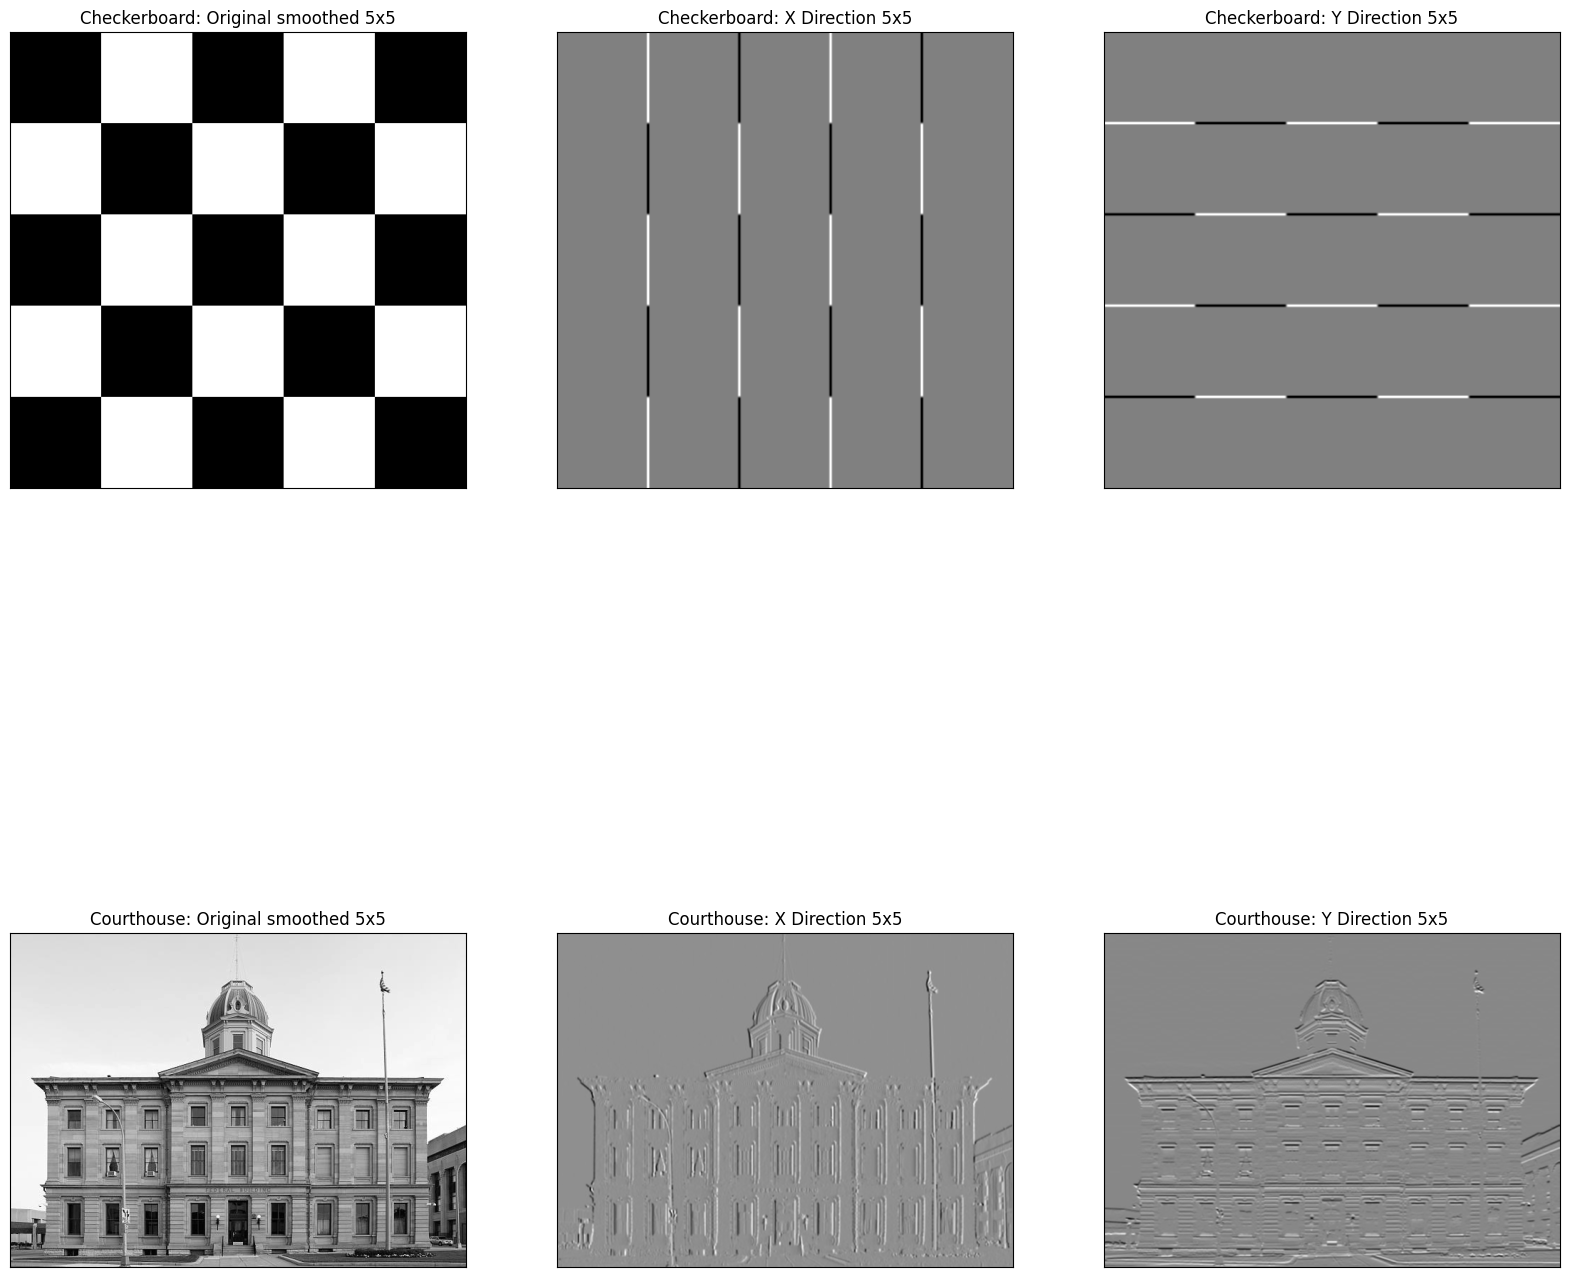

In [151]:
# Computer derivatives in x and y directions for smoothed 5x5 and 11x11, for both images
# apply 15x15 Sobel filters to the intensity channel
checkerboard_derivative_x_5 = cv2.Sobel(checkerboard_Gaussian_5, cv2.CV_64F, 1, 0, ksize=5)
checkerboard_derivative_y_5 = cv2.Sobel(checkerboard_Gaussian_5, cv2.CV_64F, 0, 1, ksize=5)

courthouse_derivative_x_5 = cv2.Sobel(courthouse_Gaussian_5, cv2.CV_64F, 1, 0, ksize=5)
courthouse_derivative_y_5 = cv2.Sobel(courthouse_Gaussian_5, cv2.CV_64F, 0, 1, ksize=5)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(231), plt.imshow(checkerboard_Gaussian_5, cmap="gray")
plt.title("Checkerboard: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(checkerboard_derivative_x_5, cmap="gray")
plt.title("Checkerboard: X Direction 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(checkerboard_derivative_y_5, cmap="gray")
plt.title("Checkerboard: Y Direction 5x5"), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(courthouse_Gaussian_5, cmap="gray")
plt.title("Courthouse: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(courthouse_derivative_x_5, cmap="gray")
plt.title("Courthouse: X Direction 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(courthouse_derivative_y_5, cmap="gray")
plt.title("Courthouse: Y Direction 5x5"), plt.xticks([]), plt.yticks([])

plt.show()

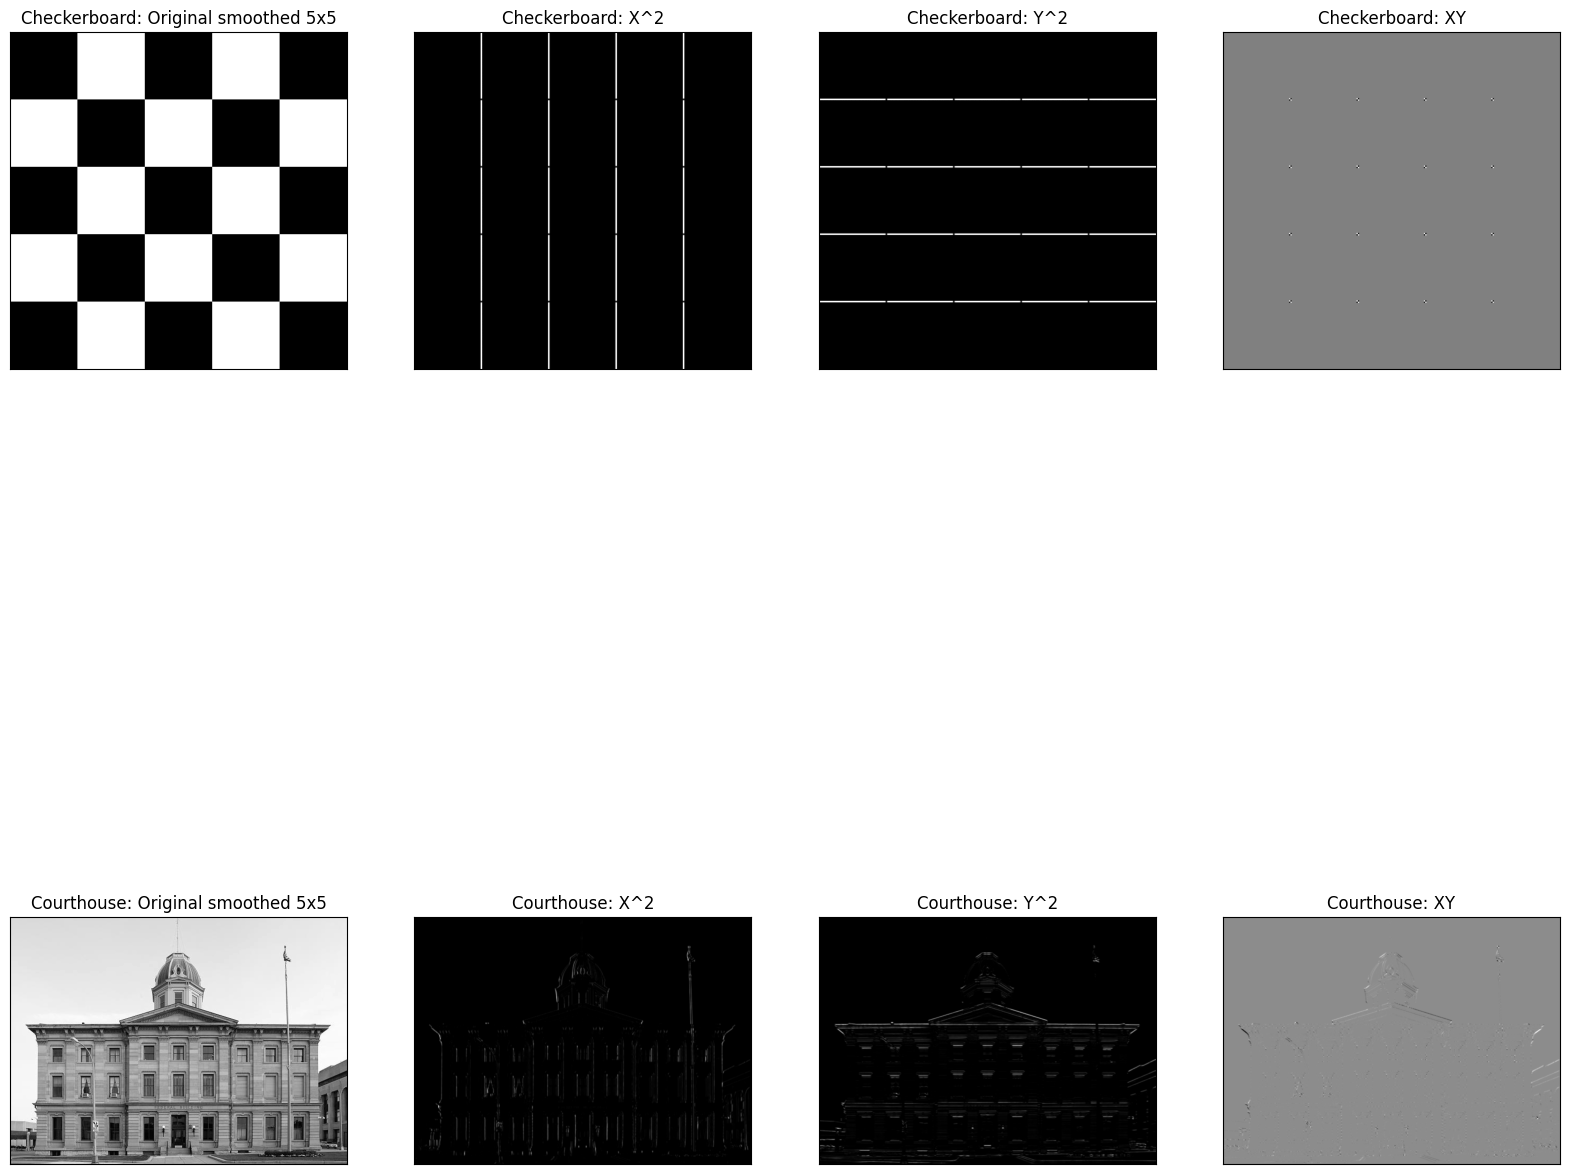

In [152]:
# compute square of derivatives
checkerboard_derivative_x2 = np.square(checkerboard_derivative_x_5)
checkerboard_derivative_y2 = np.square(checkerboard_derivative_y_5)
checkerboard_derivative_xy = checkerboard_derivative_x_5 * checkerboard_derivative_y_5

courthouse_derivative_x2 = np.square(courthouse_derivative_x_5)
courthouse_derivative_y2 = np.square(courthouse_derivative_y_5)
courthouse_derivative_xy = courthouse_derivative_x_5 * courthouse_derivative_y_5

# display images
plt.figure(figsize=(20, 20))
plt.subplot(241), plt.imshow(checkerboard_Gaussian_5, cmap="gray")
plt.title("Checkerboard: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(242), plt.imshow(checkerboard_derivative_x2, cmap="gray")
plt.title("Checkerboard: X^2"), plt.xticks([]), plt.yticks([])
plt.subplot(243), plt.imshow(checkerboard_derivative_y2, cmap="gray")
plt.title("Checkerboard: Y^2"), plt.xticks([]), plt.yticks([])
plt.subplot(244), plt.imshow(checkerboard_derivative_xy, cmap="gray")
plt.title("Checkerboard: XY"), plt.xticks([]), plt.yticks([])

plt.subplot(245), plt.imshow(courthouse_Gaussian_5, cmap="gray")
plt.title("Courthouse: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(246), plt.imshow(courthouse_derivative_x2, cmap="gray")
plt.title("Courthouse: X^2"), plt.xticks([]), plt.yticks([])
plt.subplot(247), plt.imshow(courthouse_derivative_y2, cmap="gray")
plt.title("Courthouse: Y^2"), plt.xticks([]), plt.yticks([])
plt.subplot(248), plt.imshow(courthouse_derivative_xy, cmap="gray")
plt.title("Courthouse: XY"), plt.xticks([]), plt.yticks([])

plt.show()

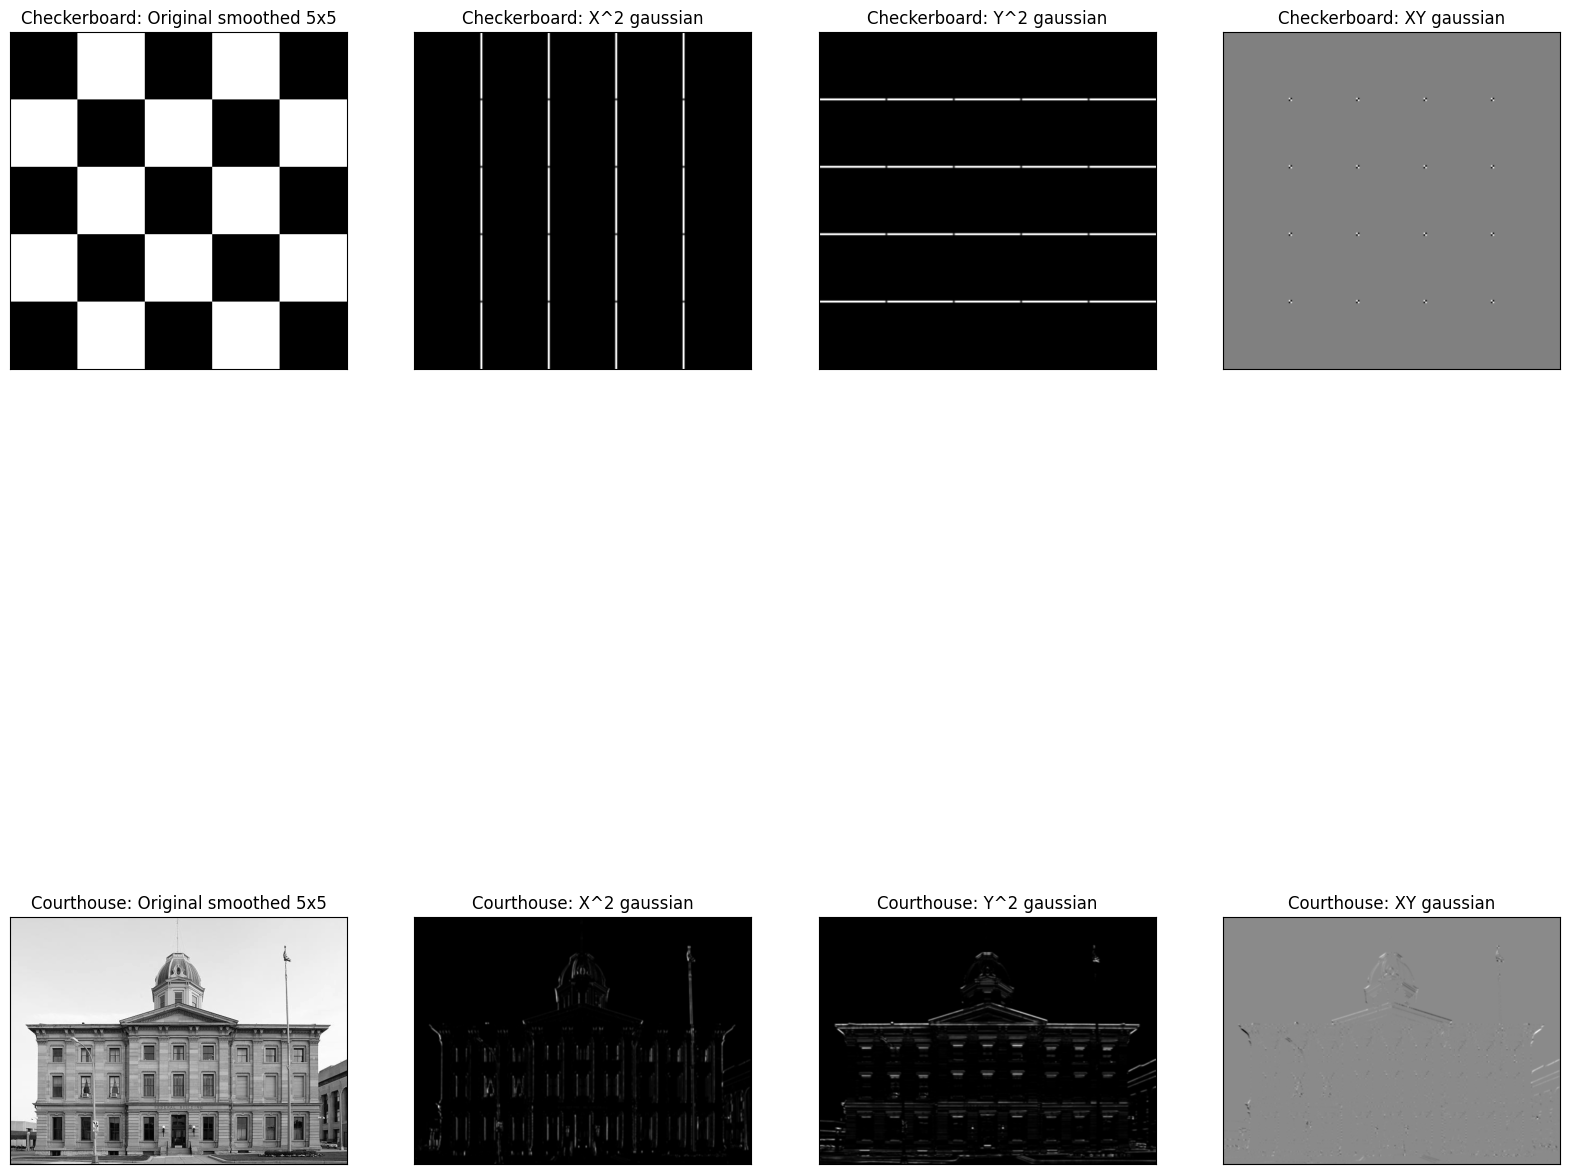

In [153]:
# apply gaussian filter
checkerboard_derivative_x2_gaussian = cv2.GaussianBlur(checkerboard_derivative_x2,(3, 3), 0)
checkerboard_derivative_y2_gaussian = cv2.GaussianBlur(checkerboard_derivative_y2,(3, 3), 0)
checkerboard_derivative_xy_gaussian = cv2.GaussianBlur(checkerboard_derivative_xy,(3, 3), 0)

courthouse_derivative_x2_gaussian = cv2.GaussianBlur(courthouse_derivative_x2,(3, 3), 0)
courthouse_derivative_y2_gaussian = cv2.GaussianBlur(courthouse_derivative_y2,(3, 3), 0)
courthouse_derivative_xy_gaussian = cv2.GaussianBlur(courthouse_derivative_xy,(3, 3), 0)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(241), plt.imshow(checkerboard_Gaussian_5, cmap="gray")
plt.title("Checkerboard: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(242), plt.imshow(checkerboard_derivative_x2_gaussian, cmap="gray")
plt.title("Checkerboard: X^2 gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(243), plt.imshow(checkerboard_derivative_y2_gaussian, cmap="gray")
plt.title("Checkerboard: Y^2 gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(244), plt.imshow(checkerboard_derivative_xy_gaussian, cmap="gray")
plt.title("Checkerboard: XY gaussian"), plt.xticks([]), plt.yticks([])

plt.subplot(245), plt.imshow(courthouse_Gaussian_5, cmap="gray")
plt.title("Courthouse: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(246), plt.imshow(courthouse_derivative_x2_gaussian, cmap="gray")
plt.title("Courthouse: X^2 gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(247), plt.imshow(courthouse_derivative_y2_gaussian, cmap="gray")
plt.title("Courthouse: Y^2 gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(248), plt.imshow(courthouse_derivative_xy_gaussian, cmap="gray")
plt.title("Courthouse: XY gaussian"), plt.xticks([]), plt.yticks([])

plt.show()

Computing the cornerness function response:
Determinant(H)−kT race(H)2), where k=0.05
Hessian matrix H is defined as: =[dx^2   dxdy]
                                 [dxdy   dy^2]
And the determinant of H is: det(H) = (dx^2 * dy^2) - (dxdy)^2
And the trace of H is: trace(H) = dx^2 + dy^2

length3


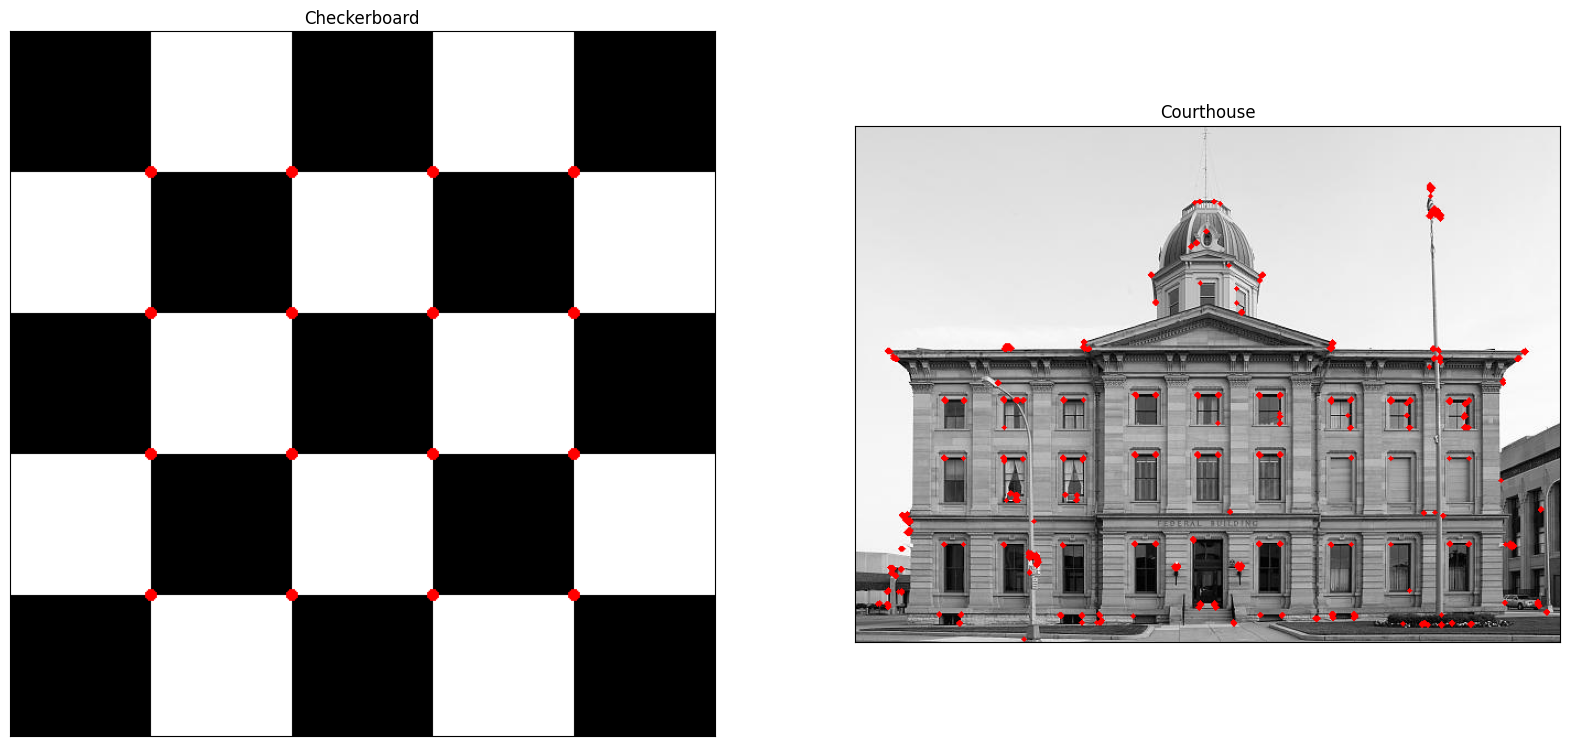

In [156]:
#based on information from tutorial 4
k=0.05
checkerboard_response = checkerboard_derivative_x2_gaussian * checkerboard_derivative_y2_gaussian - np.square(checkerboard_derivative_xy_gaussian) - k * np.square(checkerboard_derivative_x2_gaussian + checkerboard_derivative_y2_gaussian)
courthouse_response = courthouse_derivative_x2_gaussian * courthouse_derivative_y2_gaussian - np.square(courthouse_derivative_xy_gaussian) - k * np.square(courthouse_derivative_x2_gaussian + courthouse_derivative_y2_gaussian)

print("length"+str(len(courthouse.shape)))
# convert to back to RGB for displaying
checkerboard = cv2.cvtColor(checkerboard, cv2.COLOR_BGR2RGB)
courthouse = cv2.cvtColor(courthouse, cv2.COLOR_BGR2RGB)

# normalize to make the response values between 0 and 1
cv2.normalize(checkerboard_response, checkerboard_response, 0, 2, cv2.NORM_MINMAX)
cv2.normalize(courthouse_response, courthouse_response, 0, 1, cv2.NORM_MINMAX)


# threshold for an optimal value
threshold_checkerboard = 1
threshold_courthouse = 0.4

# list all points higher than threshold in the response map
loc1 = np.where(checkerboard_response >= threshold_checkerboard)
loc2 = np.where(courthouse_response >= threshold_courthouse)

# loop though points and draw red circles on checkerboard image
for pt in zip(*loc1[::-1]):
  cv2.circle(checkerboard, pt, 2, (255,0,0), -1)

# loop though points and draw red circles on courthouse image
for pt in zip(*loc2[::-1]):
  # draw filled circle on each point
  # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
  cv2.circle(courthouse, pt, 2, (255,0,0), -1)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(checkerboard)
plt.title('Checkerboard'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(courthouse)
plt.title('Courthouse'), plt.xticks([]), plt.yticks([])
plt.show()

#SIFT Features

##2.1 Sift in a nutshell

The four main actions of the SIFT (xxx) algorithm:


##2.2 SIFT between two different pictures

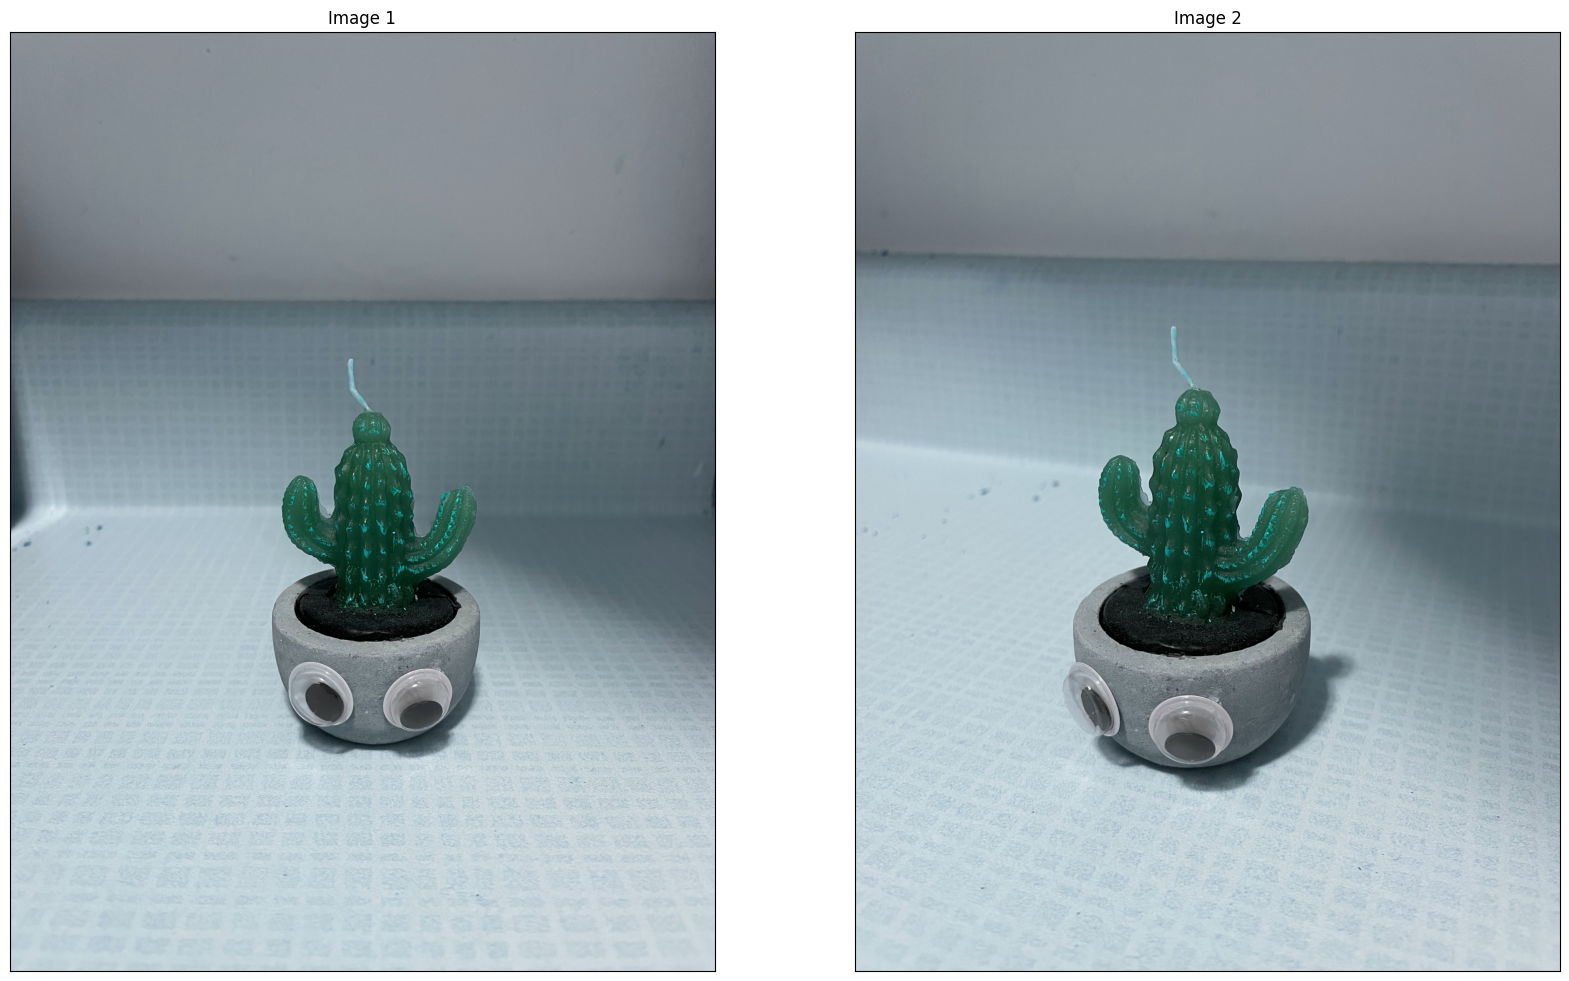

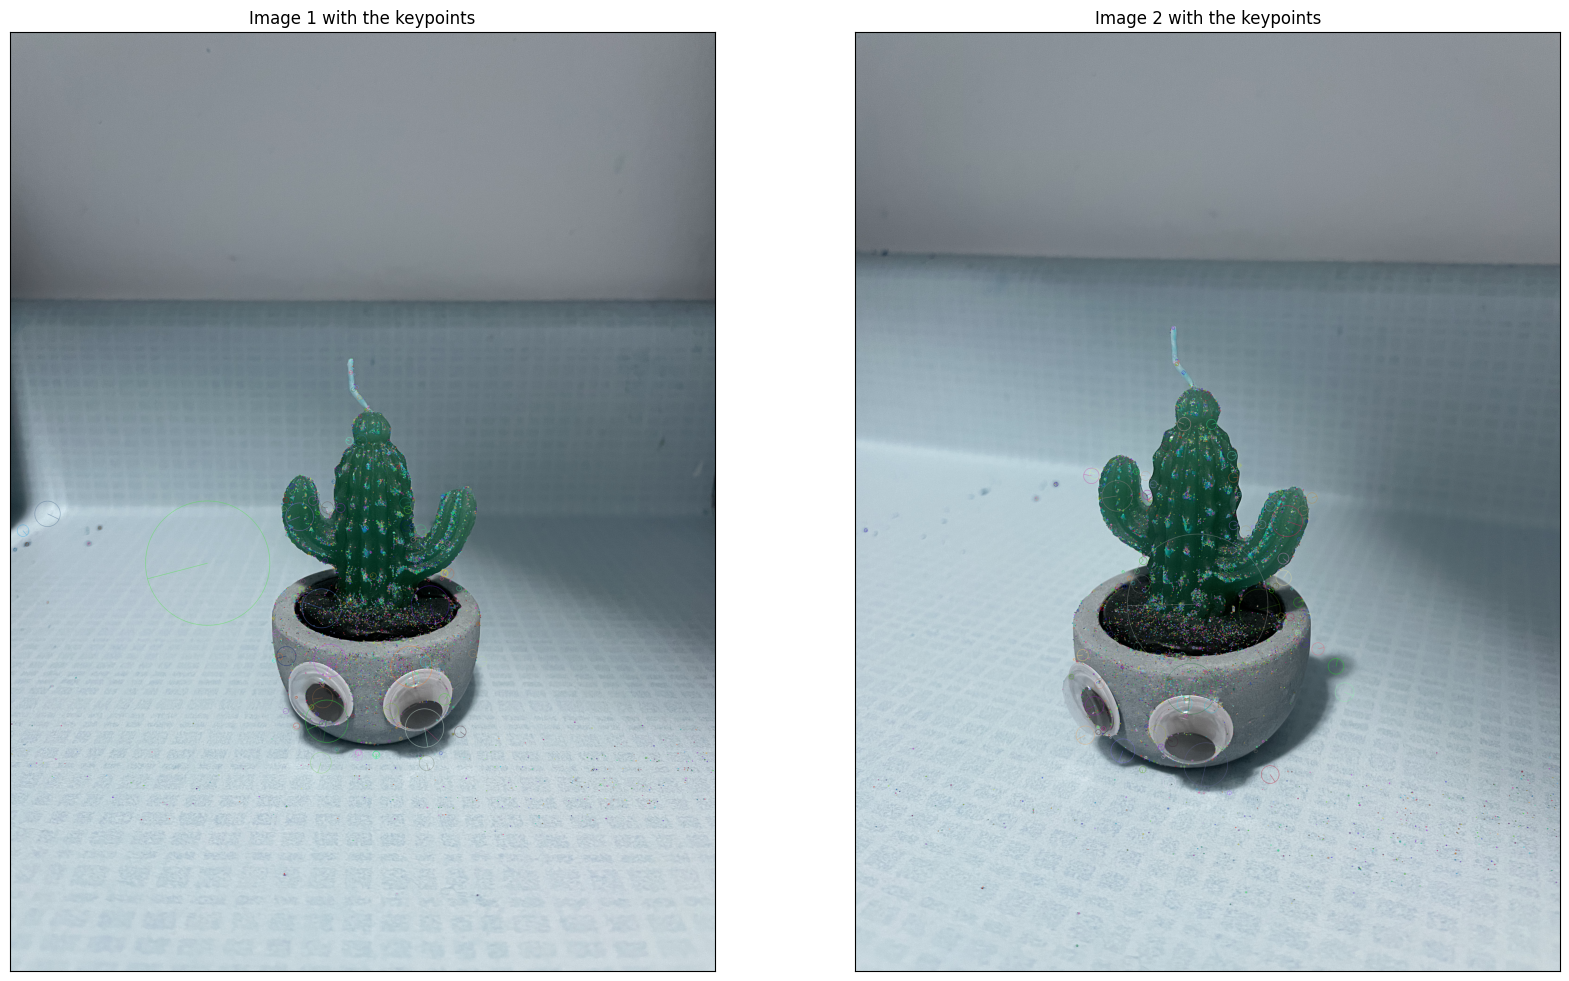

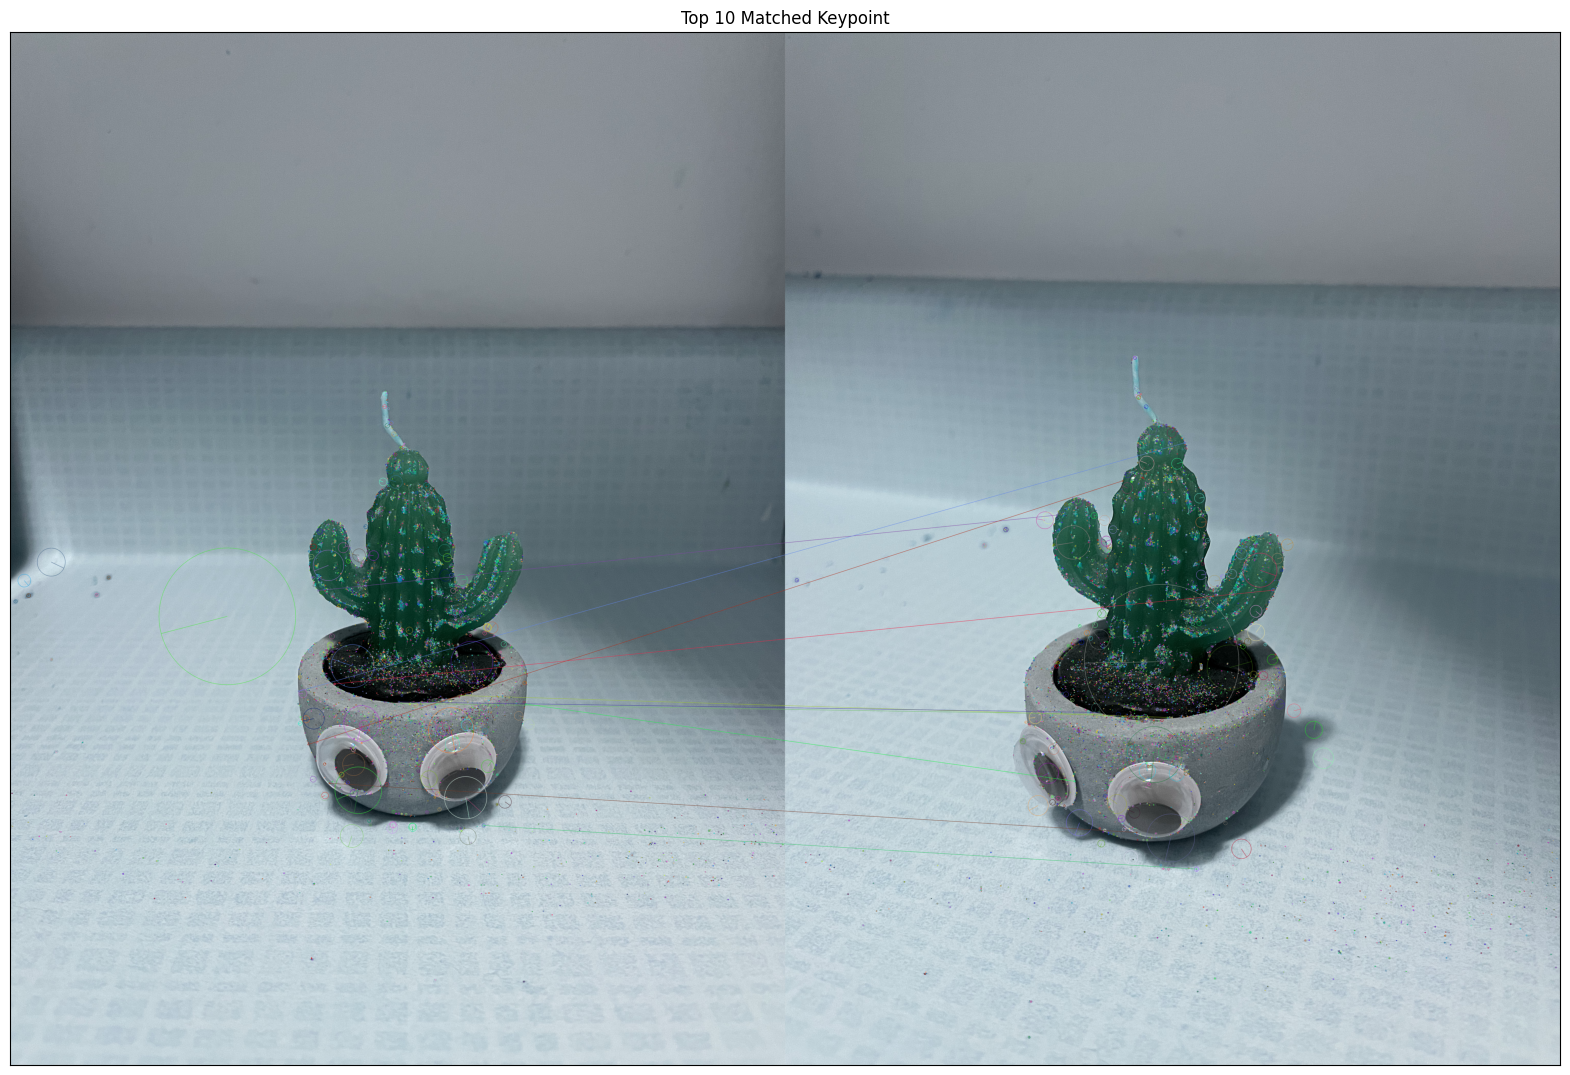

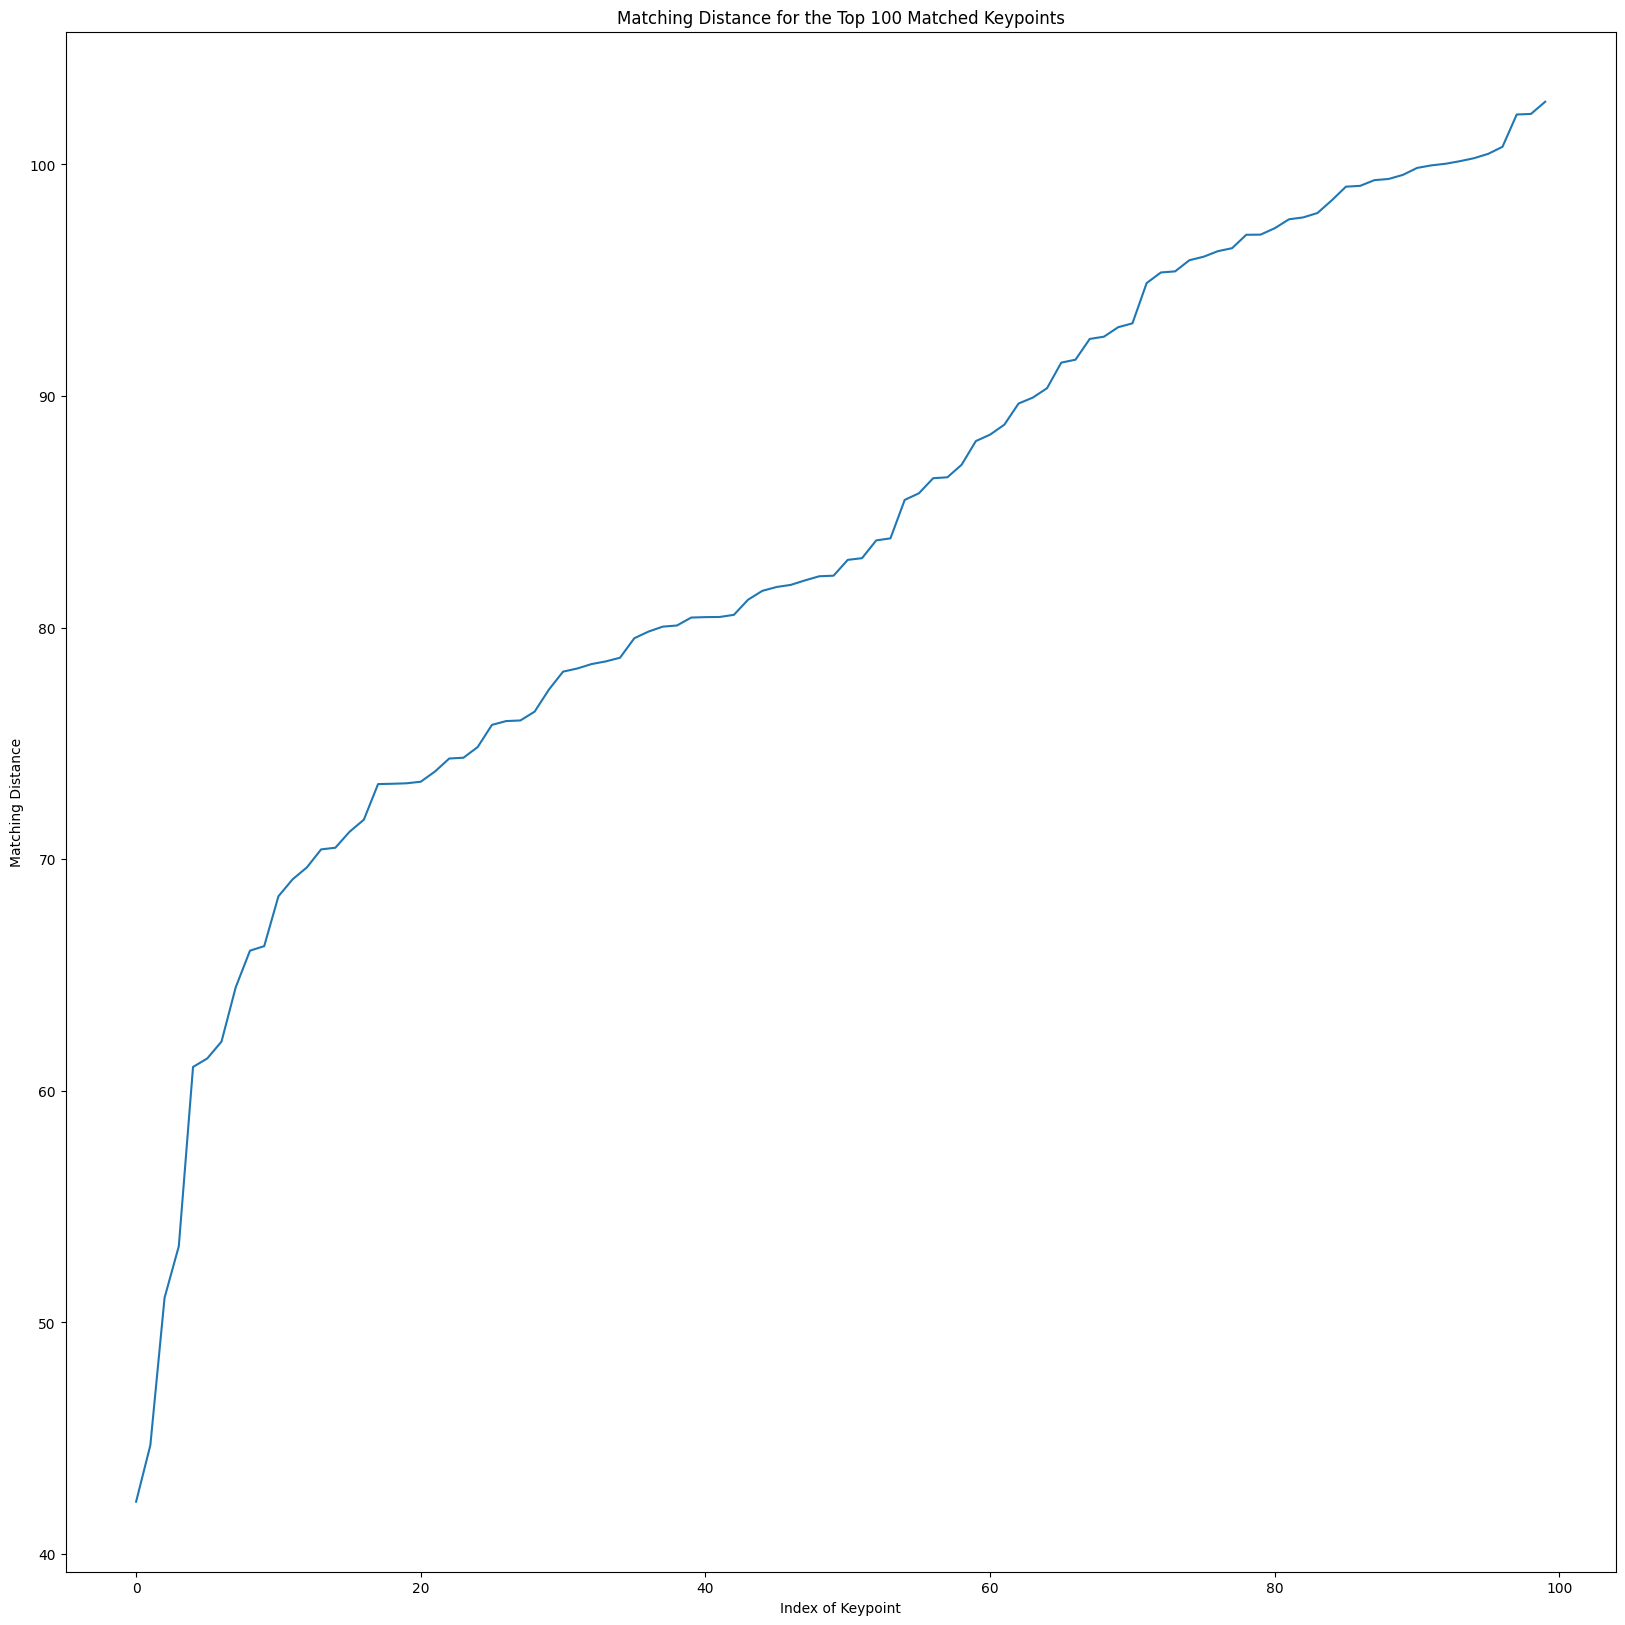

In [136]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# from google.colab import drive
# drive.mount('/content/drive')
# 
# path = '/content/drive/My Drive/ECSE415_computer_vision/A1/'
path = '/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A2/A2-W24-images/Data/'

#Load the 2 images
image_1 = cv2.imread(path+'Q2/Image1.png')
image_2 = cv2.imread(path+'Q2/Image2.png')

#Load the 2 images

# image_1 = cv2.imread(path+'Image1.png')
# image_2 = cv2.imread(path+'Image2.png')

# From tutorial 2 we know that opencv reads image in BGR format while matplotlib
# displays it in RGB format, convert from BGR to RGB for displaying

image1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

#Display images
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image_1) # 2x2 subplot, 1 selected
plt.title("Image 1"), plt.xticks([]), plt.yticks([]) # title and remove the axis ticks
plt.subplot(122), plt.imshow(image_2) # 2x2 subplot, 2 selected
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.show()

# compute SIFT keypoints for both images (from tutorial 4)
sift_obj = cv2.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(image_1, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(image_2, None)

# display keypoints
image_1 = cv2.drawKeypoints(image_1, keypoints_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_2 = cv2.drawKeypoints(image_2, keypoints_r, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Display images
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image_1) # 2x2 subplot, 1 selected
plt.title("Image 1 with the keypoints"), plt.xticks([]), plt.yticks([]) # title and remove the axis ticks
plt.subplot(122), plt.imshow(image_2) # 2x2 subplot, 2 selected
plt.title("Image 2 with the keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_l,descriptors_r)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
image_3 = cv2.drawMatches(image_1,keypoints_l,image_2,keypoints_r, matches[:10], None, flags=2)

plt.figure(figsize=(20, 20))
plt.imshow(image_3)
plt.title('Top 10 Matched Keypoint'), plt.xticks([]), plt.yticks([])
plt.show()

#Plot the matching distance for the top 100 matched keypoints. Plot the indices of keypointson the x-axis and the corresponding matching distance on the y-axis
distances = [match.distance for match in matches[:100]]
plt.figure(figsize=(20, 20))
plt.plot(range(100), distances)
plt.title('Matching Distance for the Top 100 Matched Keypoints')
plt.xlabel('Index of Keypoint')
plt.ylabel('Matching Distance')
plt.show()

##2.3  Invariance Under Scale

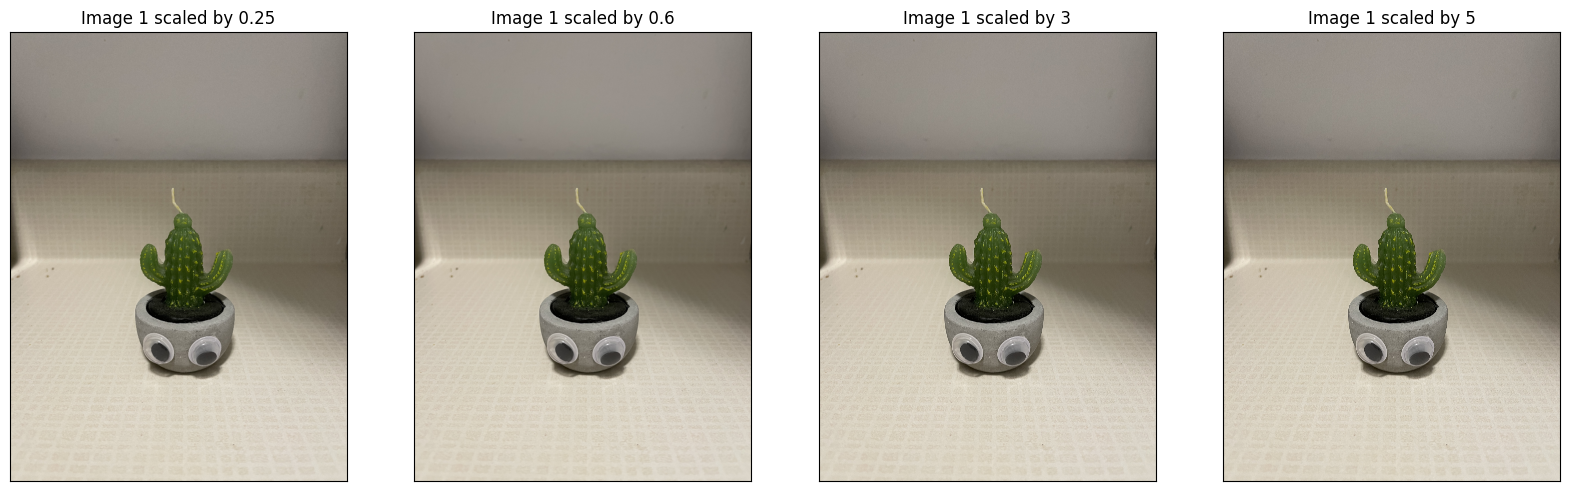

KeyboardInterrupt: 

In [137]:
# path = '/content/drive/My Drive/ECSE415_computer_vision/A1/'
# path = '/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A2/A2-W24-images/Data/'

#Load the 2 images
image_1 = cv2.imread(path+'Q2/Image1.png')
image_2 = cv2.imread(path+'Q2/Image2.png')

#Load the 2 images

# image_1 = cv2.imread(path+'Image1.png')
# image_2 = cv2.imread(path+'Image2.png')

image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# compute SIFT keypoints for image 1 (from tutorial 4)
sift_obj = cv2.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(image_1, None)

# scale image 1 by a factor of (0.25, 0.6, 3, 5)
image_1_25 = cv2.resize(image_1, (0,0), fx=0.25, fy=0.25)
image_1_6 = cv2.resize(image_1, (0,0), fx=0.6, fy=0.6)
image_1_3 = cv2.resize(image_1, (0,0), fx=3, fy=3)
image_1_5 = cv2.resize(image_1, (0,0), fx=5, fy=5)

#display scaled images:
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(image_1_25) # 2x2 subplot, 1 selected
plt.title("Image 1 scaled by 0.25"), plt.xticks([]), plt.yticks([]) # title and remove the axis ticks
plt.subplot(142), plt.imshow(image_1_6) # 2x2 subplot, 2 selected
plt.title("Image 1 scaled by 0.6"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(image_1_3) # 2x2 subplot, 3 selected
plt.title("Image 1 scaled by 3"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(image_1_5) # 2x2 subplot, 4 selected
plt.title("Image 1 scaled by 5"), plt.xticks([]), plt.yticks([])
plt.show()

# next we compute SIFT keypoints for scaled images
keypoints_25, descriptors_25 = sift_obj.detectAndCompute(image_1_25, None)
keypoints_6, descriptors_6 = sift_obj.detectAndCompute(image_1_6, None)
keypoints_3, descriptors_3 = sift_obj.detectAndCompute(image_1_3, None)
keypoints_5, descriptors_5 = sift_obj.detectAndCompute(image_1_5, None)

# Using a brute force matcher we match all keypoints between image 1 and scaled images 
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_25 = bf.match(descriptors_l,descriptors_25)
matches_6 = bf.match(descriptors_l,descriptors_6)
matches_3 = bf.match(descriptors_l,descriptors_3)
matches_5 = bf.match(descriptors_l,descriptors_5)

# Sort them in the order of their distance.
matches_25 = sorted(matches_25, key = lambda x:x.distance)
matches_6 = sorted(matches_6, key = lambda x:x.distance)
matches_3 = sorted(matches_3, key = lambda x:x.distance)
matches_5 = sorted(matches_5, key = lambda x:x.distance)

# Draw first 10 matches.
image_1_25 = cv2.drawMatches(image_1,keypoints_l,image_1_25,keypoints_25, matches_25[:10], None, flags=2)
image_1_6 = cv2.drawMatches(image_1,keypoints_l,image_1_6,keypoints_6, matches_6[:10], None, flags=2)
image_1_3 = cv2.drawMatches(image_1,keypoints_l,image_1_3,keypoints_3, matches_3[:10], None, flags=2)
image_1_5 = cv2.drawMatches(image_1,keypoints_l,image_1_5,keypoints_5, matches_5[:10], None, flags=2)

#Display images
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(image_1_25) # 2x2 subplot, 1 selected
plt.title("Image 1 and Image 1 scaled by 0.25"), plt.xticks([]), plt.yticks([]) # title and remove the axis ticks
plt.subplot(142), plt.imshow(image_1_6) # 2x2 subplot, 2 selected
plt.title("Image 1 and Image 1 scaled by 0.6"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(image_1_3) # 2x2 subplot, 3 selected
plt.title("Image 1 and Image 1 scaled by 3"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(image_1_5) # 2x2 subplot, 4 selected
plt.title("Image 1 and Image 1 scaled by 5"), plt.xticks([]), plt.yticks([])
plt.show()




##2.4  Invariance Under Rotation

#3  Image Stitching